In [1]:
import pandas as pd
import numpy as np
# from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
df=pd.read_csv("D:/LY PROJECT/dataset/datawithcossmote.csv")
df=df[['cleaned_website_text','category']]
df

,cleaned_website_text,category
0,cookie javascript trace protect privacy home q...,drug
1,cookie javascript trace protect privacy home q...,drug
2,home catalog question answer cart contact escr...,drug
3,home catalog question answer cart contact cate...,drug
4,cookie javascript trace protect privacy home q...,drug
...,...,...
20229,january internet forever mutating debates rela...,drug
20230,january technology highlights related articles...,drug
20231,credit new york times article home site index ...,non drug
20232,volatile day volatile year wall street clean n...,non drug


In [13]:
df.category.value_counts()

drug        17565
non drug     2669
Name: category, dtype: int64

In [15]:
df1=df.loc[df.category=='drug']
df2=df1.head(8000)
df2

,cleaned_website_text,category
0,cookie javascript trace protect privacy home q...,drug
1,cookie javascript trace protect privacy home q...,drug
2,home catalog question answer cart contact escr...,drug
3,home catalog question answer cart contact cate...,drug
4,cookie javascript trace protect privacy home q...,drug
...,...,...
9211,sections search skip content skip site index p...,drug
9212,sections search skip content skip site index n...,drug
9213,sections search skip content skip site index a...,drug
9214,sections search skip content skip site index e...,drug


In [16]:
df3=df.loc[df.category=='non drug']
final=pd.concat([df2,df3])
final

,cleaned_website_text,category
0,cookie javascript trace protect privacy home q...,drug
1,cookie javascript trace protect privacy home q...,drug
2,home catalog question answer cart contact escr...,drug
3,home catalog question answer cart contact cate...,drug
4,cookie javascript trace protect privacy home q...,drug
...,...,...
20223,assembly plant worker protest sao bernardo cam...,non drug
20225,january wait millennium panic level rise relat...,non drug
20231,credit new york times article home site index ...,non drug
20232,volatile day volatile year wall street clean n...,non drug


In [17]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=15,ngram_range=(1, 1), stop_words='english')

# We transform each cleaned_text into a vector
features = tfidf.fit_transform(final.cleaned_website_text).toarray()

print("Each of the %d text is represented by %d features (TF-IDF score of unigrams)" %(features.shape))
labels=final.category

Each of the 10669 text is represented by 20572 features (TF-IDF score of unigrams)


In [19]:
xtrain, X_test, ytrain, y_test,indices_train,indices_test = train_test_split(features, labels,final.index, test_size=0.25, 
                                                               random_state=1,stratify=labels)



In [20]:
X_unlabeled, X_train, x_labels, y_train,ulindex,trainindex=train_test_split(xtrain, ytrain,indices_train, test_size=0.01, 
                                                               random_state=1,stratify=ytrain)

In [21]:
print(len(X_unlabeled), len(X_train),len(y_train) ,len(X_test),len(y_test))

7920 81 81 2668 2668


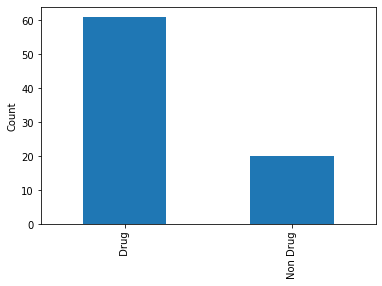

In [22]:
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred_S3 = model.predict(X_test)
# print('\n==>CLASSIFICATIION METRICS FOR DATA WITH SMOTE- SUPPORT VECTORS\n')
print("ACCURACY: ",metrics.accuracy_score(y_test, y_pred_S3))
# Classification report

Train f1 Score: 1.0
Test f1 Score: 0.4265734265734266


C:\Users\hetul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


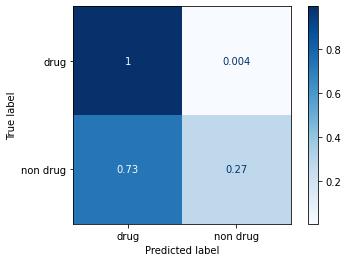

In [23]:
clf = LinearSVC(max_iter=1000)

clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
y_hat_train = clf.predict(X_train)
train_f1 = f1_score(y_train, y_hat_train,pos_label='non drug')
test_f1 = f1_score(y_test, y_hat_test,pos_label='non drug')

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['drug', 'non drug']);

In [24]:
clf._predict_proba_lr(X_test)

array([[0.56817294, 0.43182706],
       [0.61332351, 0.38667649],
       [0.61649235, 0.38350765],
       ...,
       [0.64337376, 0.35662624],
       [0.67887261, 0.32112739],
       [0.64772758, 0.35227242]])

In [25]:
ulindex=ulindex.tolist()

In [26]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1] 

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:
        
    # Fit classifier and make train/test predictions
    clf = LinearSVC(max_iter=1000)
    clf.fit(X_train, y_train)
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    train_f1 = f1_score(y_train, y_hat_train,pos_label='non drug')
    test_f1 = f1_score(y_test, y_hat_test,pos_label='non drug')
    print(f"Iteration {iterations}")
    print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
   
    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")

    pred_probs = clf._predict_proba_lr(X_unlabeled)
    preds = clf.predict(X_unlabeled)
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]
#     print(prob_0,prob_1)

    # Store predictions and probabilities in dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = ulindex
    
    # Separate predictions with > 99% probability
    high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.70],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.70]],
                          axis=0)
#     print(high_prob)
    
    print(f"{len(high_prob)} high-probability predictions added to training data.")
    
#     pseudo_labels.append(len(high_prob))
#     print(high_prob.index[0])
#     print(ulindex.tolist().index(high_prob.index[0])])
#     break
    # Add pseudo-labeled data to training data
    indd=[]
    print(len(high_prob.index))
    for i in range(0,len(high_prob.index)):
        indd.append(ulindex.index(high_prob.index[i]))
        X_train=np.r_[X_train,[ X_unlabeled[ulindex.index(high_prob.index[i])]]]
    y_train = pd.concat([y_train, high_prob.preds]) 
    print(len(X_train),len(y_train))
    # Drop pseudo-labeled instances from unlabeled data
    X_unlabeled=np.delete(X_unlabeled,[indd],axis=0)
    for i in range(0,len(high_prob.index)):
        del ulindex[ulindex.index(high_prob.index[i])]
    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")

    
    # Update iteration counter
    iterations += 1

Iteration 0
Train f1: 1.0
Test f1: 0.4265734265734266
Now predicting labels for unlabeled data...
641 high-probability predictions added to training data.
641
722 722
7279 unlabeled instances remaining.

Iteration 1
Train f1: 1.0
Test f1: 0.4265734265734266
Now predicting labels for unlabeled data...
1322 high-probability predictions added to training data.
1322
2044 2044
5957 unlabeled instances remaining.

Iteration 2
Train f1: 1.0
Test f1: 0.42154566744730676
Now predicting labels for unlabeled data...
763 high-probability predictions added to training data.
763
2807 2807
5194 unlabeled instances remaining.

Iteration 3
Train f1: 1.0
Test f1: 0.41784037558685444
Now predicting labels for unlabeled data...
581 high-probability predictions added to training data.
581
3388 3388
4613 unlabeled instances remaining.

Iteration 4
Train f1: 1.0
Test f1: 0.40661938534278963
Now predicting labels for unlabeled data...
821 high-probability predictions added to training data.
821
4209 4209
3792

In [30]:
model = LinearSVC(max_iter=1000)

model.fit(X_train, y_train)
y_pred_S3 = model.predict(X_test)
# print('\n==>CLASSIFICATIION METRICS FOR DATA WITH SMOTE- SUPPORT VECTORS\n')
print("ACCURACY: ",metrics.accuracy_score(y_test, y_pred_S3))
# Classification report

ACCURACY:  0.7859820089955023
